# 🚗 Análise Exploratória: Mercado Automotivo (2025)

Este notebook apresenta um relatório limpo e comentado de Análise Exploratória de Dados (EDA) aplicado ao dataset `Cars Datasets 2025.csv`. Ele foi concebido para compor um projeto de portfólio, com seções claras, código organizado e gráficos com paleta visual consistente.

---

## Contexto

O mercado automotivo brasileiro está em constante transformação, influenciado por fatores como preços dos combustíveis, tendências sustentáveis, e novas tecnologias. Este projeto realiza uma análise exploratória de dados (EDA) sobre um conjunto de informações de veículos disponíveis no mercado em 2025, com o objetivo de extrair insights relevantes para consumidores e profissionais do setor.

O dataset utilizado contém dados reais, modelo, ano de fabricação, tipo de combustível, preço, consumo médio, potência, transmissão e outros atributos.

## Objetivos do Projeto

- Preparar e limpar os dados
- Explorar a distribuição de marcas, preços e tipo de combustível
- Visualizar como o preço médio varia por marca
- Analisar o segmento de carros com preço até R$100.000

# Preparação dos Dados
---



## Importações e configurações iniciais

In [1]:
# Importações e configurações iniciais
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Melhorar estética dos gráficos
sns.set(style='white')
plt.rcParams['font.size'] = 12
plt.rcParams['figure.dpi'] = 100

In [2]:
# Carregar dataset
csv_path = '/content/drive/MyDrive/Aulas/Projeto/Cars Datasets (2025)/data/Cars Datasets 2025.csv'
df = pd.read_csv(csv_path, encoding='latin1')
print('Dataset carregado com sucesso:', csv_path)

# Visualizar as primeiras linhas
df.head()

Dataset carregado com sucesso: /content/drive/MyDrive/Aulas/Projeto/Cars Datasets (2025)/data/Cars Datasets 2025.csv


,Company Names,Cars Names,Engines,CC/Battery Capacity,HorsePower,Total Speed,Performance(0 - 100 )KM/H,Cars Prices,Fuel Types,Seats,Torque
0,FERRARI,SF90 STRADALE,V8,3990 cc,963 hp,340 km/h,2.5 sec,"$1,100,000",plug in hyrbrid,2,800 Nm
1,ROLLS ROYCE,PHANTOM,V12,6749 cc,563 hp,250 km/h,5.3 sec,"$460,000",Petrol,5,900 Nm
2,Ford,KA+,1.2L Petrol,"1,200 cc",70-85 hp,165 km/h,10.5 sec,"$12,000-$15,000",Petrol,5,100 - 140 Nm
3,MERCEDES,GT 63 S,V8,"3,982 cc",630 hp,250 km/h,3.2 sec,"$161,000",Petrol,4,900 Nm
4,AUDI,AUDI R8 Gt,V10,"5,204 cc",602 hp,320 km/h,3.6 sec,"$253,290",Petrol,2,560 Nm


## Visão geral rápida

In [3]:
# Visão geral rápida
print('Dimensões do dataset:', df.shape)
print('\nColunas:')
print(df.columns.tolist())

# Exibir info (tipos e nulos)
print('\nInformação resumida:')
print(df.info())


Dimensões do dataset: (1218, 11)

Colunas:
['Company Names', 'Cars Names', 'Engines', 'CC/Battery Capacity', 'HorsePower', 'Total Speed', 'Performance(0 - 100 )KM/H', 'Cars Prices', 'Fuel Types', 'Seats', 'Torque']

Informação resumida:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1218 entries, 0 to 1217
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Company Names              1218 non-null   object
 1   Cars Names                 1218 non-null   object
 2   Engines                    1218 non-null   object
 3   CC/Battery Capacity        1215 non-null   object
 4   HorsePower                 1218 non-null   object
 5   Total Speed                1218 non-null   object
 6   Performance(0 - 100 )KM/H  1212 non-null   object
 7   Cars Prices                1218 non-null   object
 8   Fuel Types                 1218 non-null   object
 9   Seats                      1218 non-null   obj

In [4]:
# Verifique se há valores ausentes e linhas duplicadas
print('Valores ausentes:', df.isnull().sum().sum())
print('Valores duplicados:', df.duplicated().sum())

Valores ausentes: 10
Valores duplicados: 4


## Limpeza de dados

In [5]:
# Transando valores ausentes e duplicados
df.dropna(inplace=True)
df.drop_duplicates(inplace=True)

# Verifique se ainda há valores ausentes e linhas duplicadas
print('Valores ausentes após tratamento:', df.isnull().sum().sum())
print('Valores duplicados após tratamento:', df.duplicated().sum())

Valores ausentes após tratamento: 0
Valores duplicados após tratamento: 0


In [6]:
def clean_price(price):
    """
    Limpa e converte valores de preço para float.
    Aceita formatos como:
        "$30,000", "30000", "30,000-40,000", "€30.000"
    Retorna:
        - Float com valor único
        - Média se for um intervalo
        - np.nan se não for possível converter
    """
    if pd.isna(price):
        return np.nan

    # Remove símbolos e caracteres estranhos
    price = str(price).replace('$', '').replace(',', '').replace('€', '').replace('\x80', '-').replace('', '-').replace('/', '-')

    # Caso seja intervalo de preços (ex: "30000-40000")
    if '-' in price:
        try:
            prices = [float(p.strip()) for p in price.split('-') if p.strip()]
            if len(prices) == 2:
                return sum(prices) / 2 # média do intervalo
            elif len(prices) == 1:
                return prices[0]
            else:
                return np.nan
        except ValueError:
            return np.nan
    else:
        try:
            return float(price.strip())
        except ValueError:
            return np.nan

def clean_seats(seats):
    """
    Limpa e converte número de assentos para int.
    Aceita formatos como:
        "5", "4-5", "4+", "4–6"
    Retorna:
        - Inteiro único
        - Média arredondada se for intervalo
        - np.nan se não for possível converter
    """
    if pd.isna(seats):
        return np.nan

    seats = str(seats).replace('\x96', '-').replace('+', '-')

    # Caso seja intervalo (ex: "4-5")
    if '-' in seats:
        try:
            seat_range = [int(s.strip()) for s in seats.split('-') if s.strip()]
            if len(seat_range) == 2:
                return round(sum(seat_range) / 2) # média do intervalo
            elif len(seat_range) == 1:
                return seat_range[0]
            else:
                return np.nan
        except ValueError:
            return np.nan
    else:
        try:
            return int(seats.strip())
        except ValueError:
            return np.nan

In [7]:
# ----------------------------
# Aplicação da limpeza no DataFrame
# ----------------------------

df_cleaned = df.copy()

# Limpeza de preços e assentos
df_cleaned['Cars Prices'] = df_cleaned['Cars Prices'].apply(clean_price)
df_cleaned['Seats'] = df_cleaned['Seats'].apply(clean_seats)

# Extração numérica de HorsePower e velocidade máxima
df_cleaned['HorsePower'] = df_cleaned['HorsePower'].str.lower().str.extract(r'(\d+)').astype(int)
df_cleaned['Total Speed'] = df_cleaned['Total Speed'].str.lower().str.extract(r'(\d+)').astype(int)

# Extração do tempo de aceleração 0-100 km/h e capacidade do motor/bateria
df_cleaned['Performance(0 - 100 )KM/H'] = df_cleaned['Performance(0 - 100 )KM/H'].str.lower().str.extract(r'([\d\.]+)').astype(float)
df_cleaned['CC/Battery Capacity'] = df_cleaned['CC/Battery Capacity'].str.lower().str.replace(',', '').str.extract(r'(\d+)').astype(float)

# Extração numérica de torque
df_cleaned['Torque'] = df_cleaned['Torque'].str.extract(r'(\d+)').astype(int)


In [8]:
# Quantos nulos após limpeza?
print('Nulos em df_cleaned:' )
print(df_cleaned.isna().sum())

Nulos em df_cleaned:
Company Names                0
Cars Names                   0
Engines                      0
CC/Battery Capacity          2
HorsePower                   0
Total Speed                  0
Performance(0 - 100 )KM/H    0
Cars Prices                  0
Fuel Types                   0
Seats                        0
Torque                       0
dtype: int64


In [9]:
# Remover linhas com dados ausentes essenciais
df_cleaned.dropna(inplace=True)

# Verifique se ainda há valores ausentes e linhas duplicadas
print('Valores nulos após tratamento:')
print(df_cleaned.isnull().sum())

Valores nulos após tratamento:
Company Names                0
Cars Names                   0
Engines                      0
CC/Battery Capacity          0
HorsePower                   0
Total Speed                  0
Performance(0 - 100 )KM/H    0
Cars Prices                  0
Fuel Types                   0
Seats                        0
Torque                       0
dtype: int64


In [10]:
print(f"✅ Dataset limpo: {df_cleaned.shape[0]} linhas e {df_cleaned.shape[1]} colunas")
df_cleaned.head()

✅ Dataset limpo: 1204 linhas e 11 colunas


,Company Names,Cars Names,Engines,CC/Battery Capacity,HorsePower,Total Speed,Performance(0 - 100 )KM/H,Cars Prices,Fuel Types,Seats,Torque
0,FERRARI,SF90 STRADALE,V8,3990.0,963,340,2.5,1100000.0,plug in hyrbrid,2,800
1,ROLLS ROYCE,PHANTOM,V12,6749.0,563,250,5.3,460000.0,Petrol,5,900
2,Ford,KA+,1.2L Petrol,1200.0,70,165,10.5,13500.0,Petrol,5,100
3,MERCEDES,GT 63 S,V8,3982.0,630,250,3.2,161000.0,Petrol,4,900
4,AUDI,AUDI R8 Gt,V10,5204.0,602,320,3.6,253290.0,Petrol,2,560


## Top 5 marcas mais comuns no dataset

In [11]:
# =======================================
# Função para plotar gráfico horizontal das 5 marcas mais comuns no dataset
# =======================================
def plot_top_5_company(df):
    """
    Cria um gráfico de barras horizontais para as cinco maiores companhias.

    Args:
      df: DataFrame do pandas contendo os dados dos carros.
    """
    df = df.sort_values(ascending=True)

    # Criação do gráfico
    fig, ax = plt.subplots(figsize=(10, 6))

    # Paleta personalizada (uma cor para cada barra)
    cores = ['#D7161B', '#E60012', '#C69334', '#0A4DA2', '#C4C4C4']

    # Barras horizontais
    ax.barh(df.index, df.values, color=cores)

    # Título e estilos
    ax.set_title(
        'Top 5 Companhias por Número de Carros',
        loc='left',
        fontsize=18,
        fontweight='bold'
    )
    ax.yaxis.set_tick_params(labelsize=12)
    ax.xaxis.set_tick_params(labelsize=12)

    # Loop para adicionar o valor máximo de cada barra
    for i, v in enumerate(df.values):
        ax.text(
            v, i,
            str(v),
            color='black',
            va='center',
            fontsize=10,
            fontweight='bold',
            ha='left'
        )
    # Retirando o Frame (retângulo que encobre os gráficos)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_visible(True)
    ax.spines['left'].set_visible(True)

    # Retirando o eixo X
    ax.get_xaxis().set_visible(False)

    plt.show()

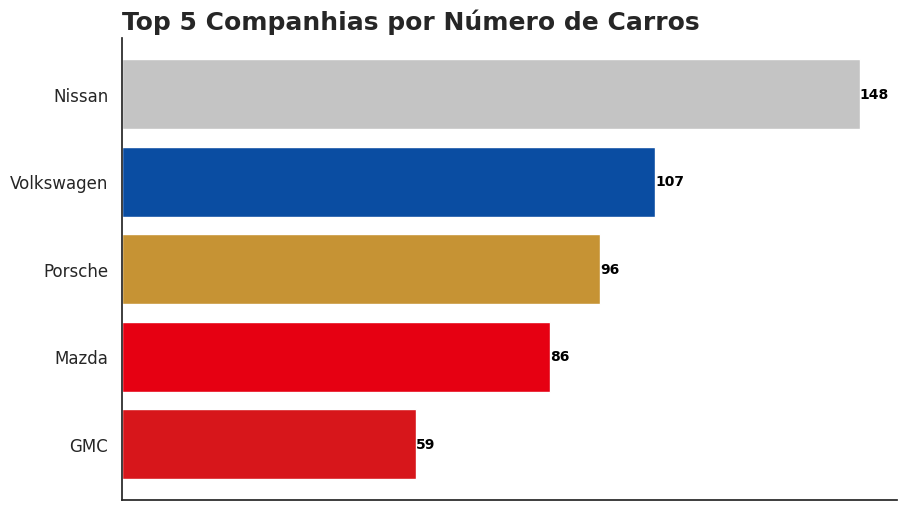


Insight: As marcas com maior presença no dataset são: Nissan, Volkswagen, Porsche, Mazda, GMC


In [12]:
top_5_company = df['Company Names'].value_counts().head(5)
plot_top_5_company(top_5_company)

# Insight
print('\nInsight: As marcas com maior presença no dataset são:', ', '.join(top_5_company.index.tolist()))

## Preço médio por marca

In [13]:
# =======================================
# Função para calcular métricas de preço por marca
# =======================================
def price_by_company(df, coluna):
    """
    Calcula métricas de preços (média, mediana, desvio padrão e contagem)
    agrupadas por marca, filtrando apenas as marcas com >= 10 registros.

    Parâmetros:
        df (DataFrame): DataFrame com colunas 'Company Names' e 'Cars Prices'
        coluna (str): Nome da métrica que será usada para ordenar e pegar o top 5 ('mean', 'median', 'std')

    Retorna:
        DataFrame: Top 5 marcas com maior valor na métrica escolhida
    """
    # Agrupa por marca e calcula estatísticas
    brand_price = df.groupby('Company Names')['Cars Prices'].agg(['mean', 'median', 'std', 'count'])

    # Filtra apenas marcas com pelo menos 10 registros
    brand_price_filtered = (
        brand_price[brand_price['count'] >= 10]
        .sort_values('mean', ascending=True)
        .reset_index()
    )

    # Ordena de acordo com a métrica solicitada e pega as top 5
    price_by_brand_top_5 = (
        brand_price_filtered.sort_values(coluna, ascending=False)
        .head(5)[['Company Names', coluna]]
        .reset_index(drop=True)
    )

    return price_by_brand_top_5

# =======================================
# Função para plotar gráfico horizontal de preços por marca
# =======================================
def plot_price_by_company(df, coluna='mean'):
    """
    Cria um gráfico de barras horizontais mostrando o preço por marca.
    Os valores são exibidos em formato abreviado (K para mil, M para milhão).

    Parâmetros:
        df (DataFrame): DataFrame com colunas 'Company Names' e métrica escolhida
        coluna (str): Nome da métrica para plotar ('mean', 'median', etc.)
    """
    # Ordena do menor para o maior para melhor visualização
    df = df.sort_values(by=coluna)

    # Função auxiliar para abreviar valores monetários
    def abbreviate_number(num):
        if abs(num) >= 1e6:
            return f'${num/1e6:.2f}M'
        elif abs(num) >= 1e3:
            return f'${num/1e3:.1f}K'
        else:
            return f'${num:.2f}'

    # Criação do gráfico
    fig, ax = plt.subplots(figsize=(10, 6))

    # Paleta personalizada (uma cor para cada barra)
    cores = ['#4B0082', '#DC0000', '#FFD700', '#004225', '#2E75B6']

    # Barras horizontais
    ax.barh(df['Company Names'], df[coluna], color=cores)

    # Título e estilos
    ax.set_title(
        f'Preço {coluna} por Marca (≥ 10 registros)',
        loc='left',
        fontsize=18,
        fontweight='bold'
    )
    ax.yaxis.set_tick_params(labelsize=12)

    # Loop para adicionar o valor máximo de cada barra
    for i, v in enumerate(df[coluna]):
        ax.text(
            v, i,
            abbreviate_number(v),
            color='black',
            va='center',
            fontsize=10,
            fontweight='bold',
            ha='left'
        )

    # Remove elementos visuais desnecessários
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

    # Remove eixo X para limpar visual
    ax.get_xaxis().set_visible(False)

    plt.tight_layout()
    plt.show()

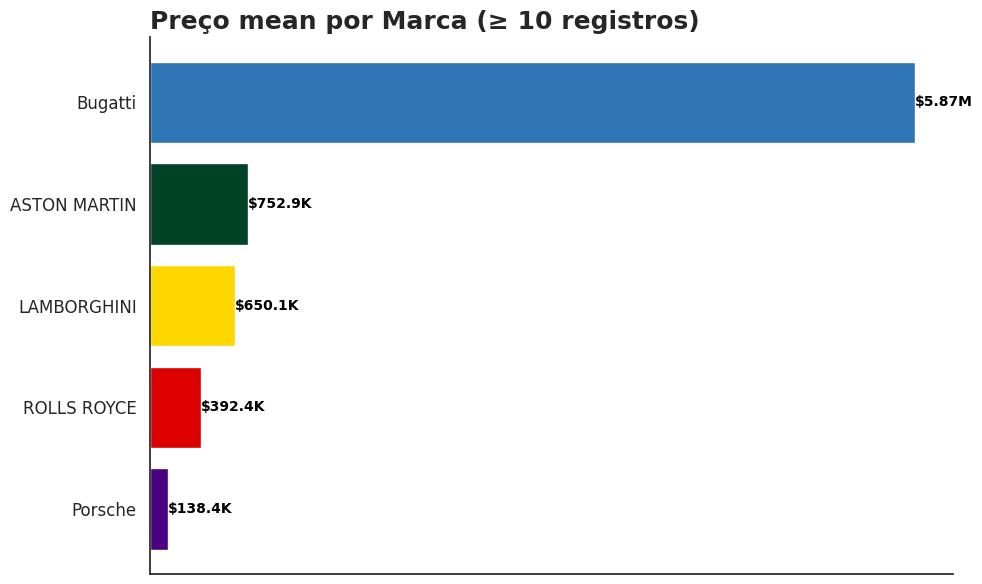


Insight: As marcas com maior preço médio no dataset são: Bugatti, ASTON MARTIN, LAMBORGHINI, ROLLS ROYCE, Porsche


In [14]:
price_by_brand_top_5 = price_by_company(df_cleaned, 'mean')
plot_price_by_company(price_by_brand_top_5)


# Insight
print('\nInsight: As marcas com maior preço médio no dataset são:', ', '.join(price_by_brand_top_5['Company Names'].tolist()))

## Distribuição por tipo de combustível

In [15]:
# =======================================
# Função para plotar gráfico das 5 Tipos de Combustível mais comuns no dataset
# =======================================
def plot_fuel_type(df):
    """
    Plota as 5 categorias de combustíveis mais comuns em um gráfico de barras verticais.

    Parâmetros:
        df (DataFrame): Dataset limpo contendo a coluna 'Fuel Types'.

    Melhoria:
        - Cores associadas aos combustíveis mais comuns.
        - Adição de rótulos de valor acima das barras.
        - Melhor ajuste de espaçamento e fonte.
    """
    # Filtra as 5 categorias mais frequentes
    fuel_counts = df['Fuel Types'].value_counts().head(5)

    # Criação do gráfico
    fig, ax = plt.subplots(figsize=(10, 6))

    # Paleta personalizada (uma cor para cada barra)
    cores = ['#D7161B', '#E60012', '#C69334', '#0A4DA2', '#C4C4C4']

    # Barras verticais
    barras = ax.bar(fuel_counts.index, fuel_counts.values, color=cores)

    # Título e estilos
    ax.set_title(
        'Top 5 Tipos de Combustível',
        loc='left',
        fontsize=18,
        fontweight='bold'
    )
    ax.yaxis.set_tick_params(labelsize=12)
    ax.xaxis.set_tick_params(labelsize=12, rotation=15)

    # Adiciona rótulos de valor acima das barras
    for barra in barras:
        altura = barra.get_height()
        ax.text(
            barra.get_x() + barra.get_width() / 2,  # posição X central da barra
            altura + (max(fuel_counts.values) * 0.02),  # posição Y levemente acima
            f"{int(altura)}",
            ha='center',
            va='bottom',
            fontsize=10,
            fontweight='bold'
        )

    # Remove bordas desnecessárias (estilo mais clean)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

    # Exibe o gráfico
    plt.tight_layout()
    plt.show()

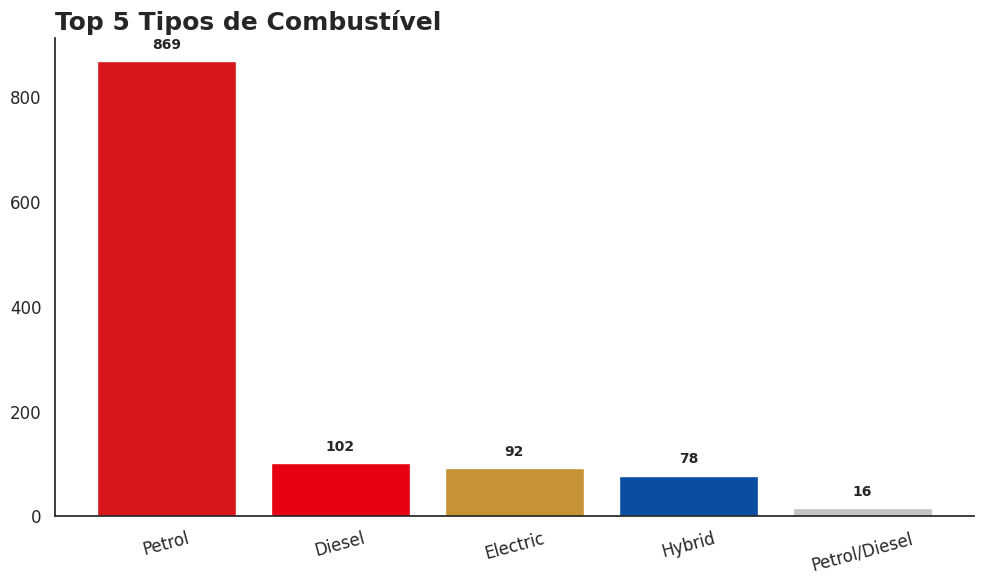


Insight: A análise mostra que esses 5 tipos de combustível representam a maioria dos veículos no dataset


In [16]:
plot_fuel_type(df_cleaned)

# Insight
print("\nInsight: A análise mostra que esses 5 tipos de combustível representam a maioria dos veículos no dataset")

## Quais marcas dominam a faixa de até R$100.000?

In [17]:
# =======================================
# Função para plotar gráfico de pizza das Top 5 marcas até R$100.000
# =======================================
def plot_dist_marcas_top5(df):
    """
    Plota um gráfico de pizza com Distribuição de Marcas na Faixa de até R$100.000.

    Parâmetros:
        df (pd.Series): Séries com índice = categorias e valores = contagens.

    """
    # Dados e cores
    cores = ['#C4C4C4', '#0A4DA2', '#E60012', '#FDB913', '#D7161B']
    explode_top1 = [0.1] + [0] * 4

    # Configuração do tamanho da figura
    plt.figure(figsize=(10, 8))

    # Criação do gráfico
    wedges, texts, autotexts = plt.pie(
        df,
        labels=df.index,
        autopct='%1.1f%%',
        startangle=90,
        colors=cores,
        explode=explode_top1,
        shadow=True,
        textprops={'fontsize': 12, 'color': 'black'},
        wedgeprops={'linewidth': 0.8, 'edgecolor': 'white'}
    )

    # Ajuste da legibilidade dos rótulos
    plt.setp(texts, size=12)
    plt.setp(autotexts, size=12, weight='bold', color='white')

    # Título
    plt.title('Distribuição de Marcas na Faixa de até R$100.000 (Top 5)', fontsize=16, fontweight='bold')

    # Garantir formato circular perfeito
    plt.axis('equal')

    # Ajuste final
    plt.tight_layout()
    plt.show()

In [18]:
# =======================================
# Análise: Top 5 marcas até R$100.000
# =======================================

# Filtrar veículos até R$100.000
df_under_100k = df_cleaned[df_cleaned['Cars Prices'] <= 100000]
print(f"Registros com preço <= R$100.000: {df_under_100k.shape[0]}")

# Contar marcas
company_counts_under_100k = df_under_100k['Company Names'].value_counts()

Registros com preço <= R$100.000: 1004


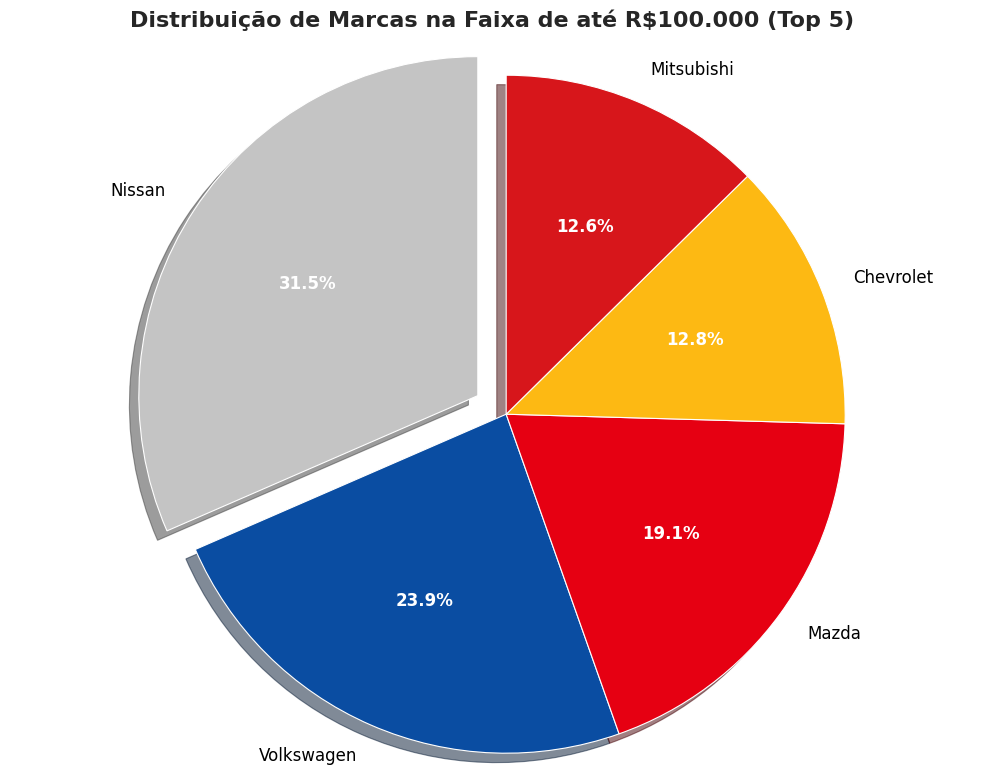



Insight: Essas marcas dominam a faixa de até R$100.000, indicando forte
presença no segmento popular, o que pode influenciar estratégias de marketing e preços.



In [19]:
plot_dist_marcas_top5(company_counts_under_100k.head(5))

# Insight
print(
"""
\nInsight: Essas marcas dominam a faixa de até R$100.000, indicando forte
presença no segmento popular, o que pode influenciar estratégias de marketing e preços.
"""
)

# 🧾 Resumo de Insights

- **Top brands**: marcas com maior presença no dataset foram identificadas no gráfico 'Top 5 Marcas'.
- **Preço médio por marca**: marcas com maior preço médio (considerando apenas marcas com >=10 registros) aparecem no gráfico de barras.
- **Faixa até R$100.000**: o setor até 100k apresenta concentração nas 5 marcas mostradas; isso pode orientar análises de competitividade e segmentação.

---